#Neural Networks

# Mount Drive

In [0]:
# from google.colab import drive
# drive.mount('/drive')

#Preprocessing

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn.preprocessing import OneHotEncoder
import math
from sklearn.model_selection import train_test_split

In [0]:
# DATASET 
#data = pd.read_csv('/drive/My Drive/Colab Notebooks/housepricedata.csv')
data = pd.read_csv("/content/housepricedata.csv")

In [4]:
data

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [0]:
X = data.drop('AboveMedianPrice',axis = 1)
Y = data['AboveMedianPrice']

## Train-Test Split

In [0]:
X_train, X_test, Y_train_not_encoded, Y_test_not_encoded = train_test_split(X, Y, test_size=0.2, random_state=1,stratify = Y)

In [0]:
# PANDAS DATAFRAMES TO NUMPY ARRAYS
X_train = X_train.values
Y_train_not_encoded = Y_train_not_encoded.values
X_test = X_test.values
Y_test_not_encoded = Y_test_not_encoded.values

## One hot encoding of Test Data

In [0]:
enc = OneHotEncoder()
# 0 -> (1, 0, 0, 0), 1 -> (0, 1, 0, 0), 2 -> (0, 0, 1, 0), 3 -> (0, 0, 0, 1)
Y_train = enc.fit_transform(np.expand_dims(Y_train_not_encoded,1)).toarray()
Y_test = enc.fit_transform(np.expand_dims(Y_test_not_encoded,1)).toarray()

## Standardization

In [0]:
mean_train=[X_train[:,0].mean(),X_train[:,1].mean(),X_train[:,2].mean(),X_train[:,3].mean(),X_train[:,4].mean(),X_train[:,5].mean(),X_train[:,6].mean(),X_train[:,7].mean(),X_train[:,8].mean(),X_train[:,9].mean()]
std_train=[X_train[:,0].std(),X_train[:,1].std(),X_train[:,2].std(),X_train[:,3].std(),X_train[:,4].std(),X_train[:,5].std(),X_train[:,6].std(),X_train[:,7].std(),X_train[:,8].std(),X_train[:,9].std()]

In [0]:
for x in range(X_train.shape[0]):
  X_train[x] = (X_train[x] - mean_train)/std_train

for x in range(X_test.shape[0]):
  X_test[x] = (X_test[x] - mean_train)/std_train

# Training of Model Starts

## Activation Functions

In [0]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

def softmax(x,y):
  return np.exp(x)/(np.exp(x)+np.exp(y))

def tanh(x):
  return 2*(sigmoid(2*x)) - 1

## Number of Hidden Neurons

In [0]:
hidden_neurons = 25                                                #################################

## Weights Initialization

In [0]:
# wts1 = np.random.uniform(0,1,(hidden_neurons,X_train.shape[1]))    #################################
# b1 = np.random.uniform(0,1,hidden_neurons)                         #################################

# wts2 = np.random.uniform(0,1,(2,hidden_neurons))                   #################################
# b2 = np.random.uniform(0,1,2)                                      #################################
# wt_text="Uniform"                                                 #################################

In [0]:
wts1 = np.random.randn(hidden_neurons,X_train.shape[1])          #################################
b1 = np.random.randn(hidden_neurons)                             #################################

wts2 = np.random.randn(2,hidden_neurons)                         #################################
b2 = np.random.randn(2)                                          #################################
wt_text="Gaussian"                                               #################################

In [0]:
pred_value = np.zeros((X_train.shape[0],2))
lr = 0.0005                                                        #################################
epochs = 350                                                       #################################
activation_text="Sigmoid"                                    ################################
#activation_text="tanh"                                       ################################

## Feed Forward and Backpropagation

In [16]:
# Gradient Descent

loss = []
for epoch in tqdm_notebook(range(epochs),total = epochs, unit = 'epoch'):
  error = 0
  a1 = np.dot(X_train,wts1.T)
  for i in range(a1.shape[0]):
    for j in range(a1.shape[1]):
      a1[i][j]+=b1[j]

  h1 = np.zeros(a1.shape)
  for i in range(a1.shape[0]):
    for j in range(a1.shape[1]):
        h1[i][j] = sigmoid(a1[i][j])                                #################################

  a2 = np.dot(h1,wts2.T)
  for i in range(a2.shape[0]):
    for j in range(a2.shape[1]):
      a2[i][j]+=b2[j]


  for i in range(a2.shape[0]):
    pred_value[i][0] = softmax(a2[i][0],a2[i][1])
    pred_value[i][1] = softmax(a2[i][1],a2[i][0])

  for i in range(len(pred_value)):
    if Y_train[i][0] == 1:
      error+=np.log(pred_value[i][0])
    else:
      error+=np.log(pred_value[i][1])
  error*=-1
  error/=X_train.shape[0]
  loss.append(error)

# Backpropagation

  grad_w2 = np.zeros((hidden_neurons,2))
  grad_b2 = np.zeros((1,2))
  
  grad_w1 = np.zeros((X_train.shape[1],hidden_neurons))
  grad_b1 = np.zeros((1,hidden_neurons))

  grad_a2 = pred_value - Y_train

  grad_w2 = np.dot(grad_a2.T, h1)
  grad_b2 = np.sum(grad_a2,axis = 0)
  grad_h1 = np.dot(grad_a2,wts2)
  grad_a1 = np.multiply(grad_h1,np.multiply(h1,1-h1))              #################################
  #grad_a1 = np.multiply(grad_h1,1 - np.multiply(h1,h1))           #################################
  
  grad_w1 = np.dot(grad_a1.T,X_train)
  grad_b1 = np.sum(grad_a1,axis = 0) 

  #Update Rule
  wts2 = wts2 - lr*grad_w2
  b2 = b2 - lr*grad_b2
  wts1 = wts1 - lr*grad_w1
  b1 = b1 - lr*grad_b1
  print(error)                                                   #################################


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


2.104913441604239
0.9805942531781204
0.8675116457693176
0.784040138716871
0.7224719300605846
0.6722502105625018
0.6325696710286047
0.5989543103651788
0.5714506711087878
0.5481025946036455
0.528478547255021
0.5116164486229969
0.49700806715235973
0.4841510825381541
0.47271410147303694
0.4624399060539358
0.45314583888803833
0.44469216625288316
0.4369707978982881
0.42989387303004356
0.4233884259993073
0.4173924393137451
0.41185260841088556
0.40672269320666515
0.40196234991738894
0.3975362061435776
0.39341312141325324
0.38956557786054413
0.38596917386313934
0.38260219970030757
0.3794452800812713
0.3764810717071149
0.3736940063728076
0.3710700719478089
0.3685966249637093
0.3662622296679106
0.3640565193074893
0.36197007614672294
0.35999432732432257
0.35812145414966007
0.35634431284138834
0.35465636504329373
0.3530516167244783
0.3515245642950636
0.35007014695313504
0.3486837044313351
0.3473609394378507
0.34609788419155935
0.3448908705386483
0.3437365032111521
0.3426316358494043
0.3415733494620

## Loss vs Epochs

In [17]:
fig_text="Weight initialization- "+ wt_text + "\nActivation function- "+ activation_text + "\nHidden neurons- " + str(hidden_neurons)+ "\nEpochs="+ str(epochs)+"\nLearning Rate="+str(lr)
print(fig_text)

Weight initialization- Gaussian
Activation function- Sigmoid
Hidden neurons- 25
Epochs=350
Learning Rate=0.0005


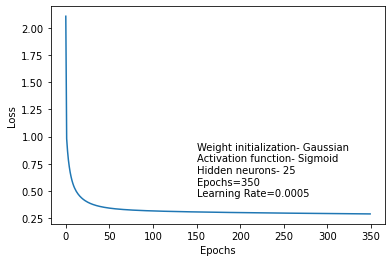

In [18]:
plt.plot(loss)                       ###########################################
plt.text(150, 0.45, fig_text)        ###########################################
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


#Evaluation

In [0]:
pred_value = np.zeros((X_test.shape[0],2))
a1 = np.dot(X_test,wts1.T)
for i in range(a1.shape[0]):
  for j in range(a1.shape[1]):
    a1[i][j]+=b1[j]

h1 = np.zeros(a1.shape)
for i in range(a1.shape[0]):
  for j in range(a1.shape[1]):
      h1[i][j] = sigmoid(a1[i][j])                   ###################################

a2 = np.dot(h1,wts2.T)
for i in range(a2.shape[0]):
  for j in range(a2.shape[1]):
    a2[i][j]+=b2[j]


for i in range(a2.shape[0]):
  pred_value[i][0] = softmax(a2[i][0],a2[i][1])
  pred_value[i][1] = softmax(a2[i][1],a2[i][0])

for i in range(len(pred_value)):
  if Y_test[i][0] == 1:
    error+=np.log(pred_value[i][0])
  else:
    error+=np.log(pred_value[i][1])
error*=-1
error/=X_test.shape[0]
loss.append(error)


In [0]:
pred_y = []

In [0]:
for i in range(len(pred_value)):
  if pred_value[i][0]>pred_value[i][1]:
    pred_y.append(0)
  else:
    pred_y.append(1)

In [0]:
tp=0 #true positive
tn=0 #true negative
fp=0 #false positive
fn=0 #false negative
for i in range(len(Y_test)):
  if Y_test_not_encoded[i] == pred_y[i] ==1:
    tp+=1
  elif Y_test_not_encoded[i] == pred_y[i] ==0:
    tn+=1
  elif pred_y[i]==1 and Y_test_not_encoded[i]==0:
    fp+=1
  elif Y_test_not_encoded[i]==1 and pred_y[i]==0:
    fn+=1

In [23]:
test_accuracy = (tp+tn)/(tp+tn+fp+fn)
print(test_accuracy)

0.8595890410958904


In [24]:
precision = tp/(tp+fp)
recall = tp/(tp+fn)
precision

0.847682119205298

In [25]:
recall

0.8767123287671232

In [26]:
f_score = 2*precision*recall/(precision+recall)
f_score

0.861952861952862